# Logistic Regression


## Imports


In [1]:
import util
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate


## Reading the data


### Train Data


In [7]:
X, y = util.getData(path='../data/train_data.csv', scaleNumericalFeatures=True)

# create a new column called weightOverHeightSquared
# X['weightOverHeightSquared'] = X['Weight'] / X['Height'] ** 2

# X = X[['Weight', 'Height']]


### Validation data


In [3]:
# Divide the train data into training and validation
X_train = X[:int(0.8 * len(X))]
y_train = y[:int(0.8 * len(y))]
X_val = X[int(0.8 * len(X)):]
y_val = y[int(0.8 * len(y)):]


### Test Data


In [4]:
X_test, y_test = util.getData(
    path='../data/train_data.csv', scaleNumericalFeatures=True)

# create a new column called weightOverHeightSquared
# X_test['weightOverHeightSquared'] = X_test['Weight'] / X_test['Height'] ** 2

# X_test = X_test[['Weight', 'Height']]


## Training the model


In [5]:
lr = LogisticRegression(C=100, max_iter=10000)
lr.fit(X, y)
cv_results = cross_validate(lr, X, y, cv=5, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())


accuracy:  0.972892083243939
f1_macro:  0.9604217389881546
f1_micro:  0.972892083243939


## Model Analysis


### Feature Importance Plot

A feature importance plot shows the importance of each feature in the model. It can be used to identify the most important features and to understand the impact of each feature on the model's predictions.


                            feature  importance
0                            Weight        0.66
1                            Height        0.18
14              Transport_Motorbike        0.03
16                Transport_Walking        0.03
13                   Transport_Bike        0.02
6                        Smoking_no        0.01
7                       Smoking_yes        0.01
3                        Meal_Count        0.01
11               Alcohol_Consump_no        0.01
12             Transport_Automobile        0.01
15  Transport_Public_Transportation        0.01
4                          Phys_Act        0.00
5                     Water_Consump        0.00
9        Alcohol_Consump_Frequently        0.00
10        Alcohol_Consump_Sometimes        0.00
2                               Age        0.00
8            Alcohol_Consump_Always        0.00


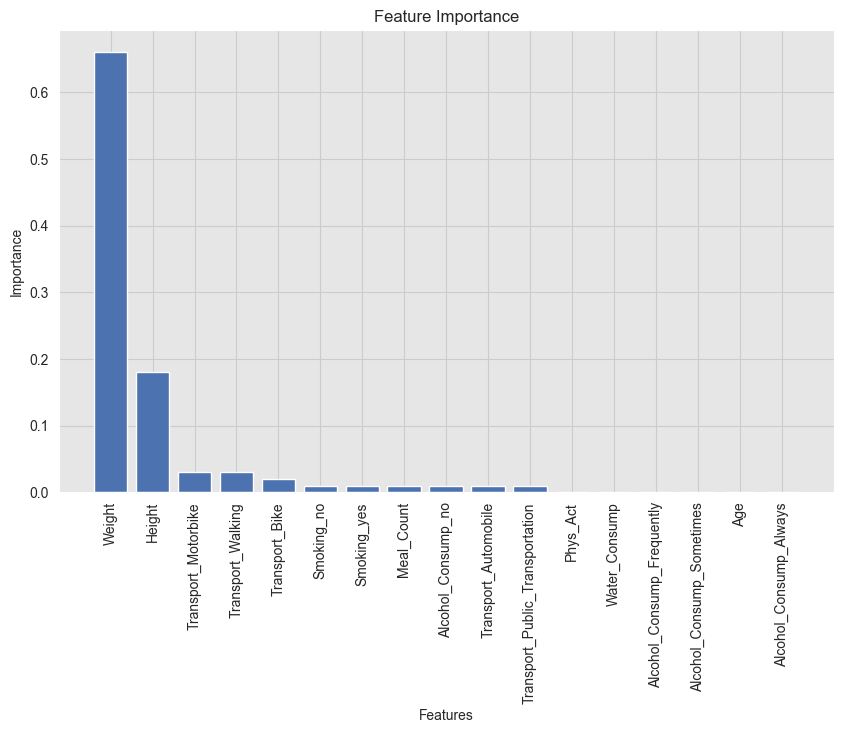

In [6]:
# Get the feature importance
importance = (abs(lr.coef_[0]) / np.abs(lr.coef_[0]).sum()).round(2)

feature_importance = util.getFeatureImportance(
    features=X.columns, importance=importance)
print(feature_importance)

plt = util.getFeatureImportancePlot(feature_importance)
plt.show()


### Learning Curves Plot

show the training error (Ein) and validation error (Eval) as a function of the training set size


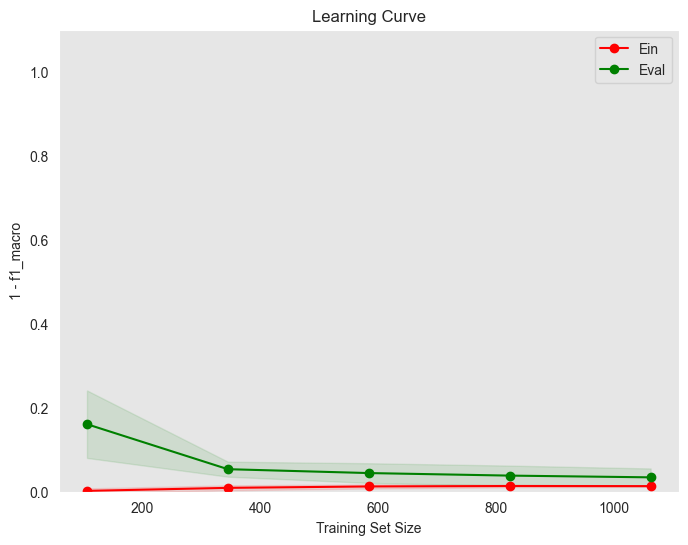

In [7]:
plt = util.getLearningCurvePlot(estimator=LogisticRegression(
    C=100, max_iter=10000), X=X, y=y, cv=10)
plt.show()


### Partial Dependence Plot:

A partial dependence plot shows the relationship between a feature and the model's predictions while holding all other features constant. It can be used to understand the impact of a single feature on the model's predictions i.e. PDPs show the average effect on predictions as the value of feature changes.

From the plots, we may see the type of the relationship between a feature and a prediction. Some relationships may look linear whereas other are more complex.


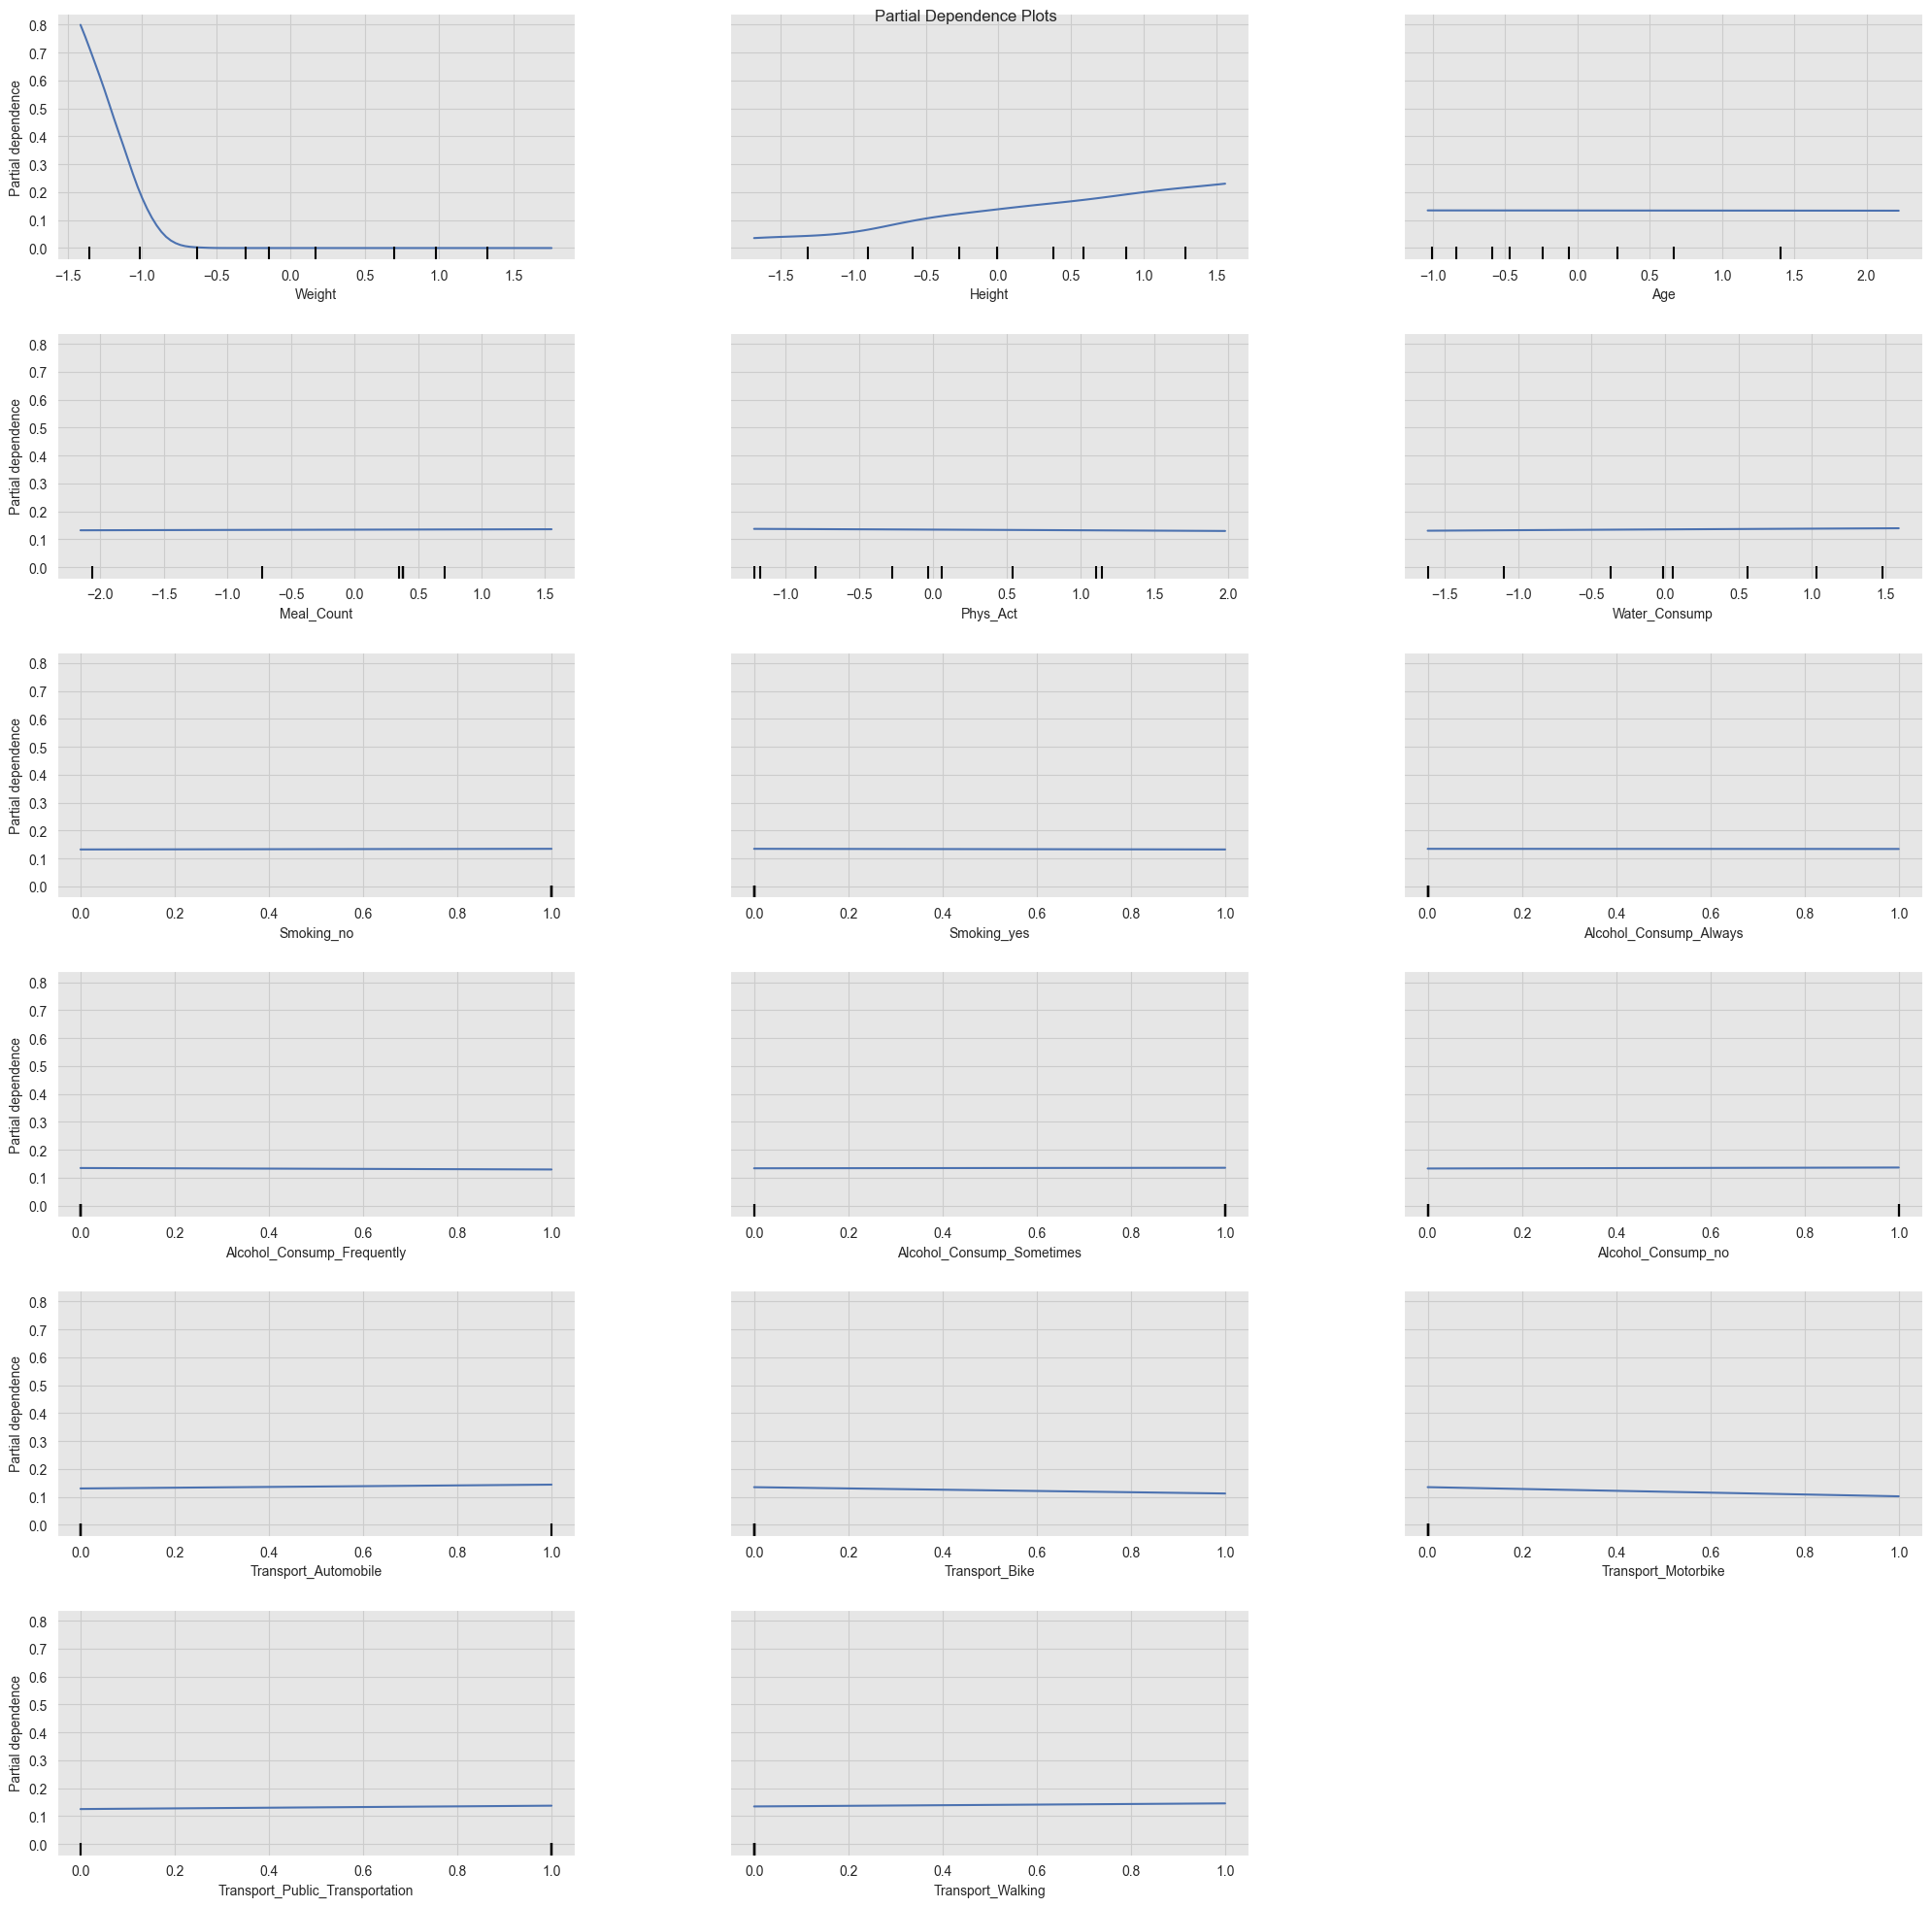

In [8]:
plt = util.getPartialDependenciesPlot(lr, X)
plt.show()


### Hyperparameter Tuning

This is a process of adjusting the parameters of a model to optimize its performance. It can be done using techniques like grid search, random search, or Bayesian optimization.


In [9]:
# Define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}


### Grid Search


In [10]:
grid_search = util.getGridSearch(estimator=LogisticRegression(
    max_iter=10000), param_grid=param_grid, X=X_train, y=y_train, cv=10, scoring='f1_macro')
# Print the results
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)
print("Test score with best parameters:", grid_search.score(X_val, y_val))


Best parameters found: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best score found: 0.9683814996925774
Test score with best parameters: 0.966636441509922


### Heatmap


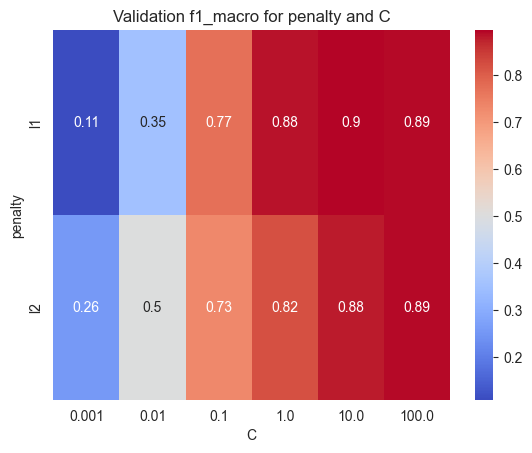

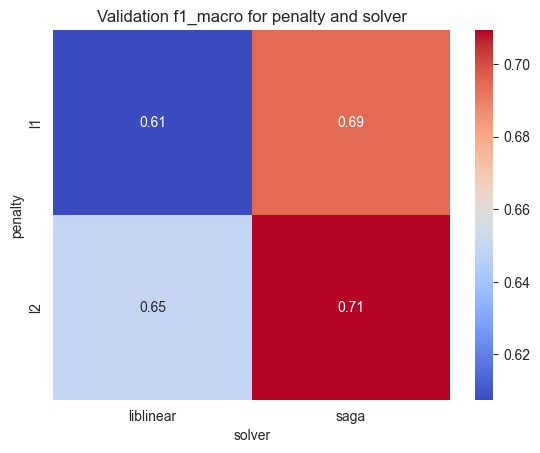

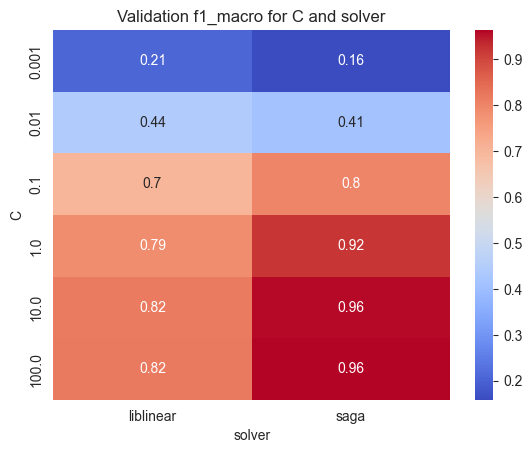

In [11]:
util.plotHyperParamHeatMaps(param_grid, grid_search)


### Train-Validation Curve


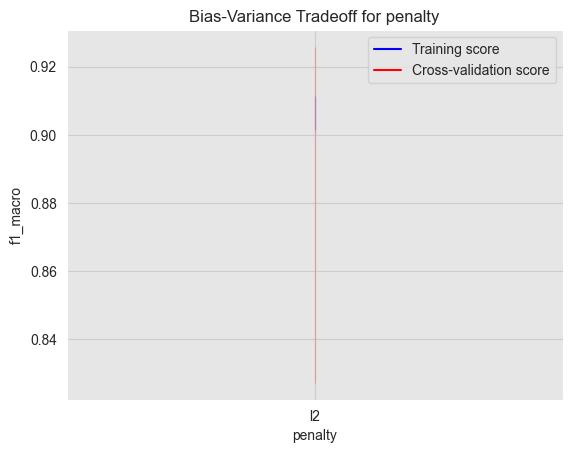

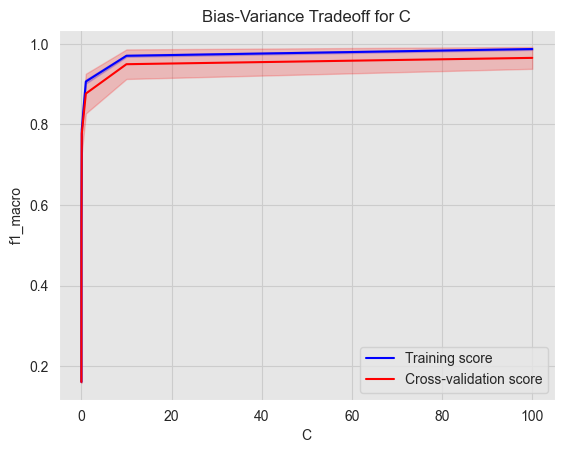

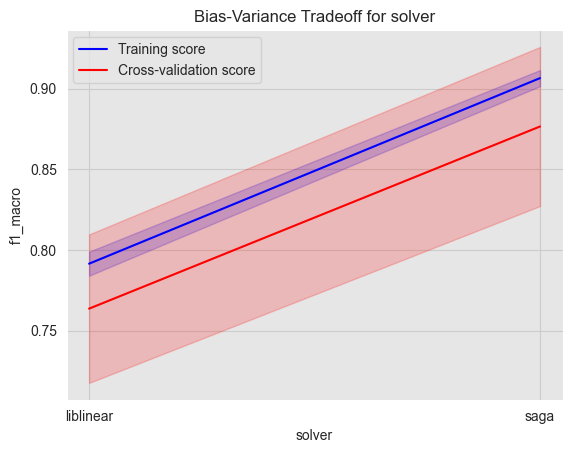

In [12]:


util.plotHyperParamTrainValidationCurve(estimator=LogisticRegression(
    max_iter=10000), param_grid=param_grid, X=X_train, y=y_train, cv=10, scoring='f1_macro')


## Bias-Variance Analysis


In [13]:

lr = LogisticRegression(C=0.1, max_iter=10000)

mse, bias, var = util.getBiasVariance(
    lr, X_train=X_train, y_train=y_train, X_test=X_val, y_test=y_val)


In [14]:
print("mse: ", mse)
print("bias: ", bias)
print("var: ", var)


mse:  0.14151898734177215
bias:  0.10231118143459915
var:  0.039207805907173


### Decision Boundary Plot


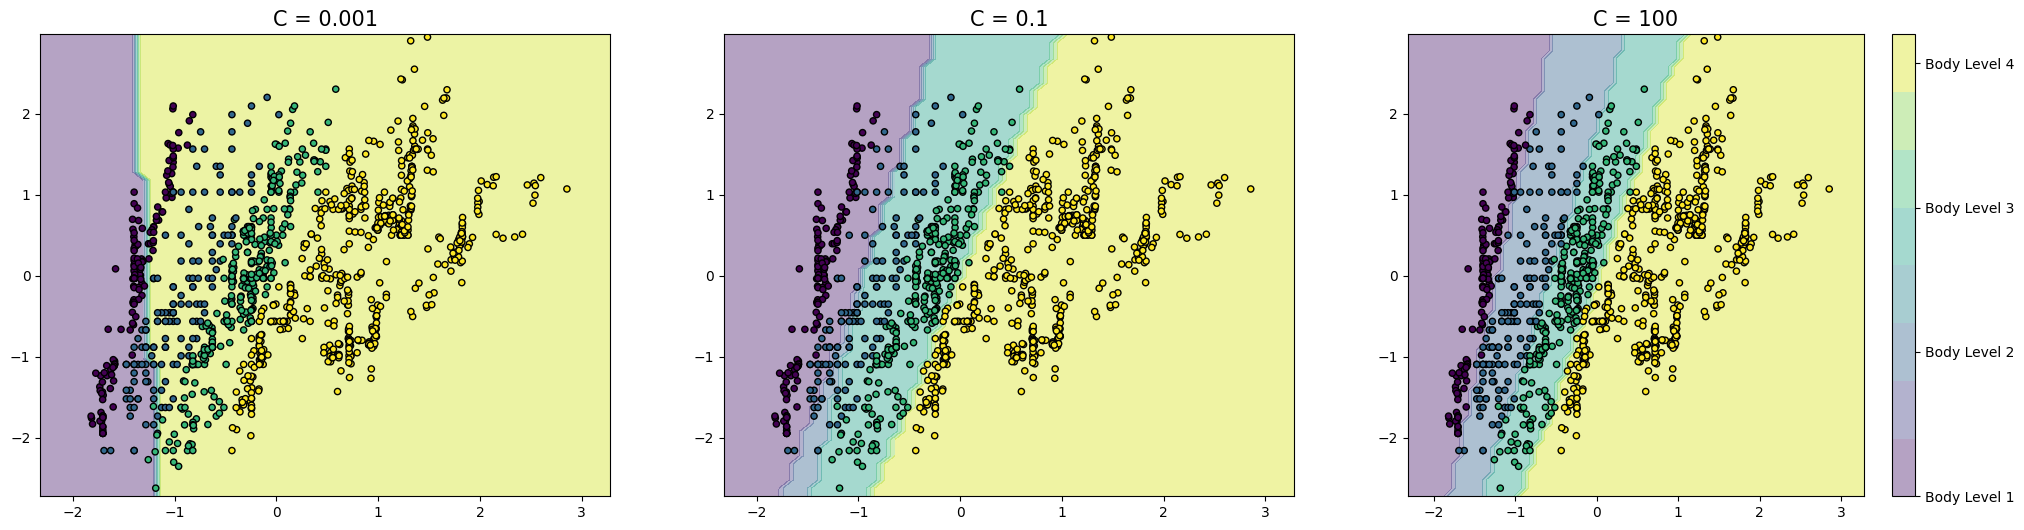

In [8]:
# reset style to default
plt.style.use('default')

# create a decision boundary plot at 3 different C values
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
formatter = plt.FuncFormatter(lambda val, loc: ['Body Level 1', 'Body Level 2', 'Body Level 3', 'Body Level 4'][val])
X = X[['Weight', 'Height']]
for i, C in enumerate([0.001, 0.1, 100]):
    lr = LogisticRegression(C=C, max_iter=10000)
    lr.fit(X, y)
    contours = util.plot_decision_regions(lr, X, y, axes[i])
    axes[i].set_title('C = ' + str(C), size=15)


plt.colorbar(contours, ticks =[0, 1, 2, 3],format=formatter)
plt.show()

